In [1]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as pt
import pickle
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation

# Gathering data and building it

In [2]:
# dir_data="C:/Users/Soujayna/anaconda3/Anotebooks/ml pros/dog cat classification"
categories=['Dog','Cat']

In [3]:
# data=[]

# for i in categories:
#     path=os.path.join(dir_data,i)
#     files=os.listdir(path)
#     label=categories.index(i)
#     for k in files:
#         img_arr=cv2.imread(os.path.join(path,k),cv2.IMREAD_GRAYSCALE)
#         if img_arr is None:
#             continue
#         new_arr=cv2.resize(img_arr,(50,50))
#         data.append([new_arr,label])

In [4]:
# len(data)

In [5]:
# for x in data[:10]:
#     print(x[1])

In [6]:
# temp=data.copy()
# random.shuffle(temp)

In [7]:
# for i in temp[:5]:
#     print(i[1])

In [8]:
# X=[]
# y=[]
# for feat,label in temp:
#     X.append(feat)
#     y.append(label)
# X=np.array(X).reshape(-1,50,50,1)

In [9]:
# len(X)

In [10]:
# y[:5]

Storing processed and shuffled image-label dataset

In [11]:
# pickle_out=open("X_dogcat.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out=open("ylabels_dogcat.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()

# Fetching data

In [12]:
pickle_in=open("X_dogcat.pickle","rb")
imgs=pickle.load(pickle_in)
pickle_in.close()

pickle_in=open('ylabels_dogcat.pickle','rb')
labels=pickle.load(pickle_in)
pickle_in.close()

In [13]:
imgs.shape

(24913, 50, 50, 1)

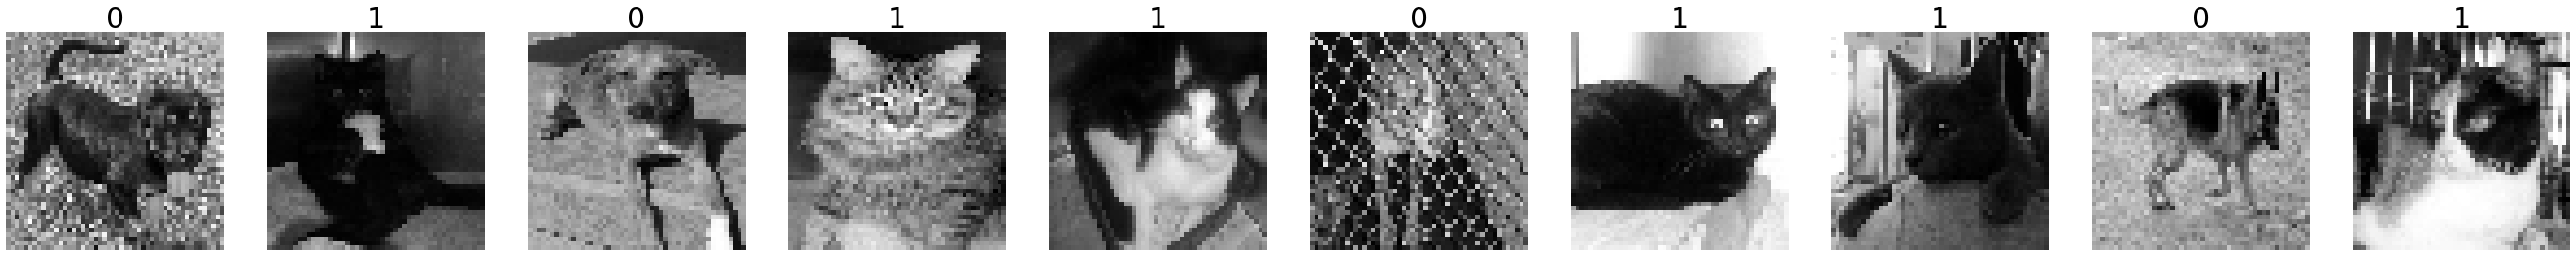

In [14]:
fig,axs=pt.subplots(1,10,figsize=(50,50))
for i in range(10):
    axs[i].imshow(imgs[i],cmap='gray')
    axs[i].set_title(labels[i],fontsize=30)
    axs[i].axis('off')

In [15]:
imgs=imgs/255.0
imgs[0][0]

array([[0.52941176],
       [0.51764706],
       [0.65098039],
       [0.43137255],
       [0.6627451 ],
       [0.52156863],
       [0.69019608],
       [0.49019608],
       [0.54117647],
       [0.47058824],
       [0.51764706],
       [0.43137255],
       [0.50588235],
       [0.41176471],
       [0.52941176],
       [0.39607843],
       [0.44313725],
       [0.42352941],
       [0.52156863],
       [0.6       ],
       [0.48235294],
       [0.52941176],
       [0.41568627],
       [0.46666667],
       [0.4745098 ],
       [0.70196078],
       [0.60392157],
       [0.55686275],
       [0.41176471],
       [0.47058824],
       [0.62352941],
       [0.47843137],
       [0.68627451],
       [0.47843137],
       [0.40392157],
       [0.40784314],
       [0.65098039],
       [0.63921569],
       [0.68627451],
       [0.70980392],
       [0.69019608],
       [0.49019608],
       [0.76078431],
       [0.63529412],
       [0.73333333],
       [0.66666667],
       [0.74117647],
       [0.682

Data was preprocessed during formatting stage 

# Splitting data

In [16]:
imgs=np.array(imgs).reshape(-1,50,50,1)
labels=np.array(labels)

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(imgs,labels)

Train data

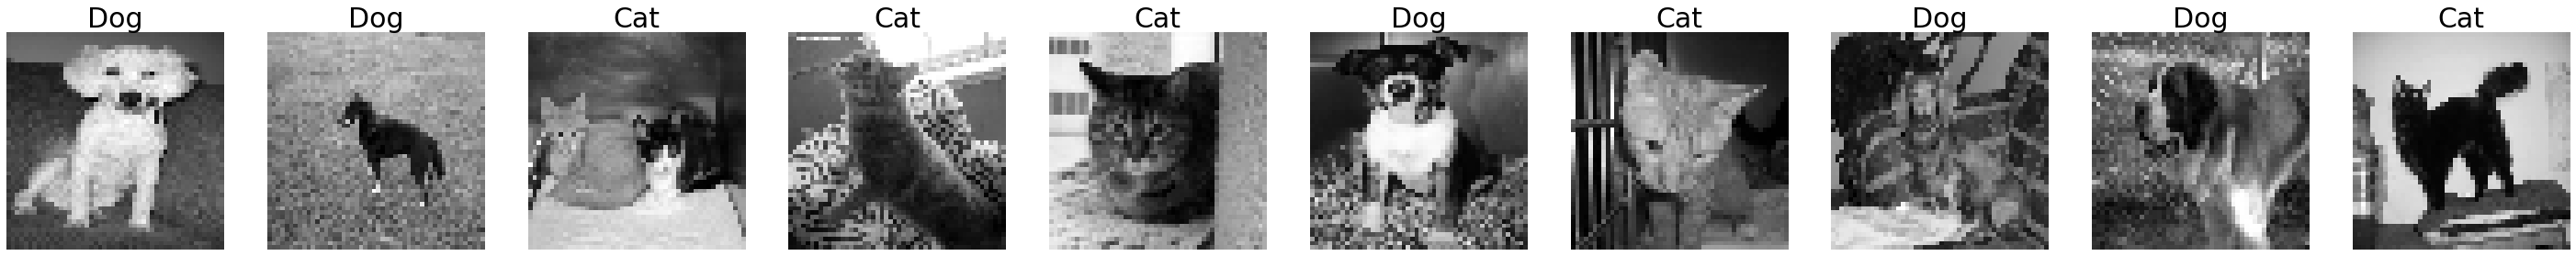

In [18]:
fig,axs=pt.subplots(1,10,figsize=(50,50))
for i in range(10):
    axs[i].imshow(Xtrain[i],cmap='gray')
    axs[i].set_title(categories[ytrain[i]],fontsize=30)
    axs[i].axis('off')

Test data

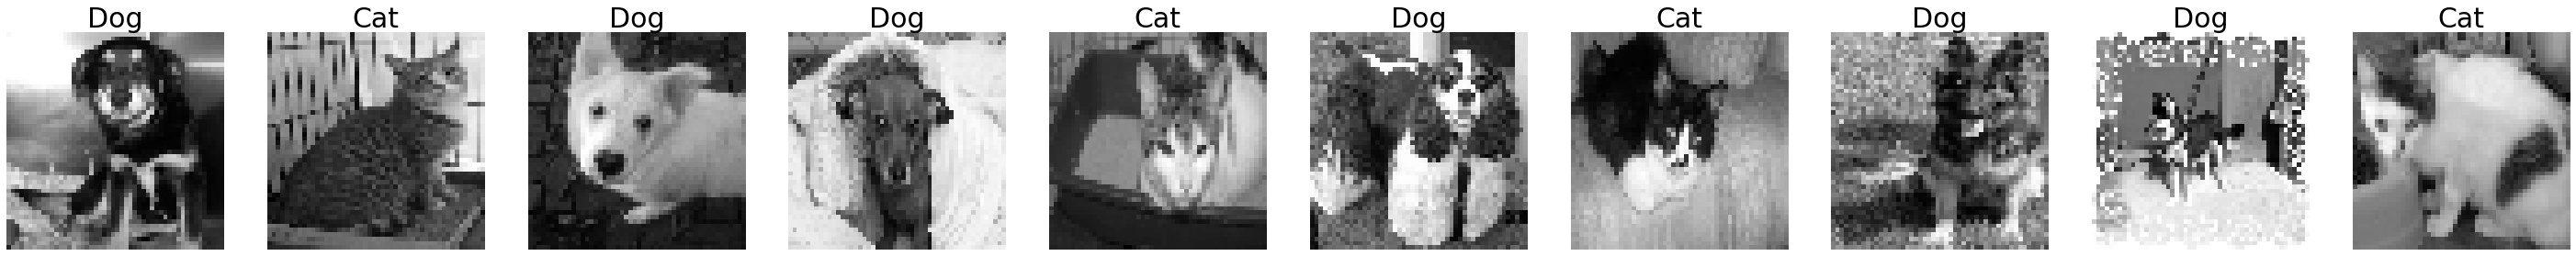

In [19]:
fig,axs=pt.subplots(1,10,figsize=(50,50))
for i in range(10):
    axs[i].imshow(Xtest[i],cmap='gray')
    axs[i].set_title(categories[ytest[i]],fontsize=30)
    axs[i].axis('off')

# Building Model

In [20]:
inputshape=imgs.shape

In [21]:
model3=Sequential()
model3.add(Conv2D(32,kernel_size=(3,3),input_shape=inputshape[1:]))
model3.add(MaxPooling2D((2,2)))

model3.add(Conv2D(64,kernel_size=(3,3),input_shape=inputshape[1:]))
model3.add(MaxPooling2D((2,2)))

model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [22]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Training the model

In [23]:
model3.fit(Xtrain,ytrain,epochs=6)

Epoch 1/6
584/584 [==============================] - 21s 34ms/step - loss: 0.5992 - accuracy: 0.6685
Epoch 2/6
584/584 [==============================] - 26s 45ms/step - loss: 0.4887 - accuracy: 0.7617
Epoch 3/6
584/584 [==============================] - 29s 49ms/step - loss: 0.4000 - accuracy: 0.8172
Epoch 4/6
584/584 [==============================] - 29s 50ms/step - loss: 0.2800 - accuracy: 0.8794
Epoch 5/6
584/584 [==============================] - 30s 52ms/step - loss: 0.1438 - accuracy: 0.9466
Epoch 6/6
584/584 [==============================] - 32s 54ms/step - loss: 0.0706 - accuracy: 0.9745


# Testing model's accuracy on test data

In [24]:
Xtest.reshape(-1,50,50,1)

array([[[[0.96862745],
         [0.98823529],
         [1.        ],
         ...,
         [0.38431373],
         [0.36862745],
         [0.38039216]],

        [[0.99607843],
         [1.        ],
         [1.        ],
         ...,
         [0.39607843],
         [0.38039216],
         [0.38823529]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.40784314],
         [0.40392157],
         [0.4       ]],

        ...,

        [[0.36078431],
         [0.27843137],
         [0.31372549],
         ...,
         [0.15686275],
         [0.17647059],
         [0.18431373]],

        [[0.38039216],
         [0.2745098 ],
         [0.48627451],
         ...,
         [0.15686275],
         [0.16862745],
         [0.18039216]],

        [[0.12941176],
         [0.49803922],
         [0.50980392],
         ...,
         [0.16470588],
         [0.18823529],
         [0.19215686]]],


       [[[0.41176471],
         [0.66666667],
         [0.67

In [25]:
pred=model3.predict(Xtest)

195/195 [==============================] - 4s 17ms/step


In [26]:
def pred_ops(pred):
    ans=[]
    for i in pred:
        if i>=0.5:
            ans.append(1)
        else:
            ans.append(0)
            
    return ans
pred_values=pred_ops(pred)
pred_values

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(ytest,pred_values))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3101
           1       0.77      0.73      0.75      3128

    accuracy                           0.75      6229
   macro avg       0.75      0.75      0.75      6229
weighted avg       0.75      0.75      0.75      6229



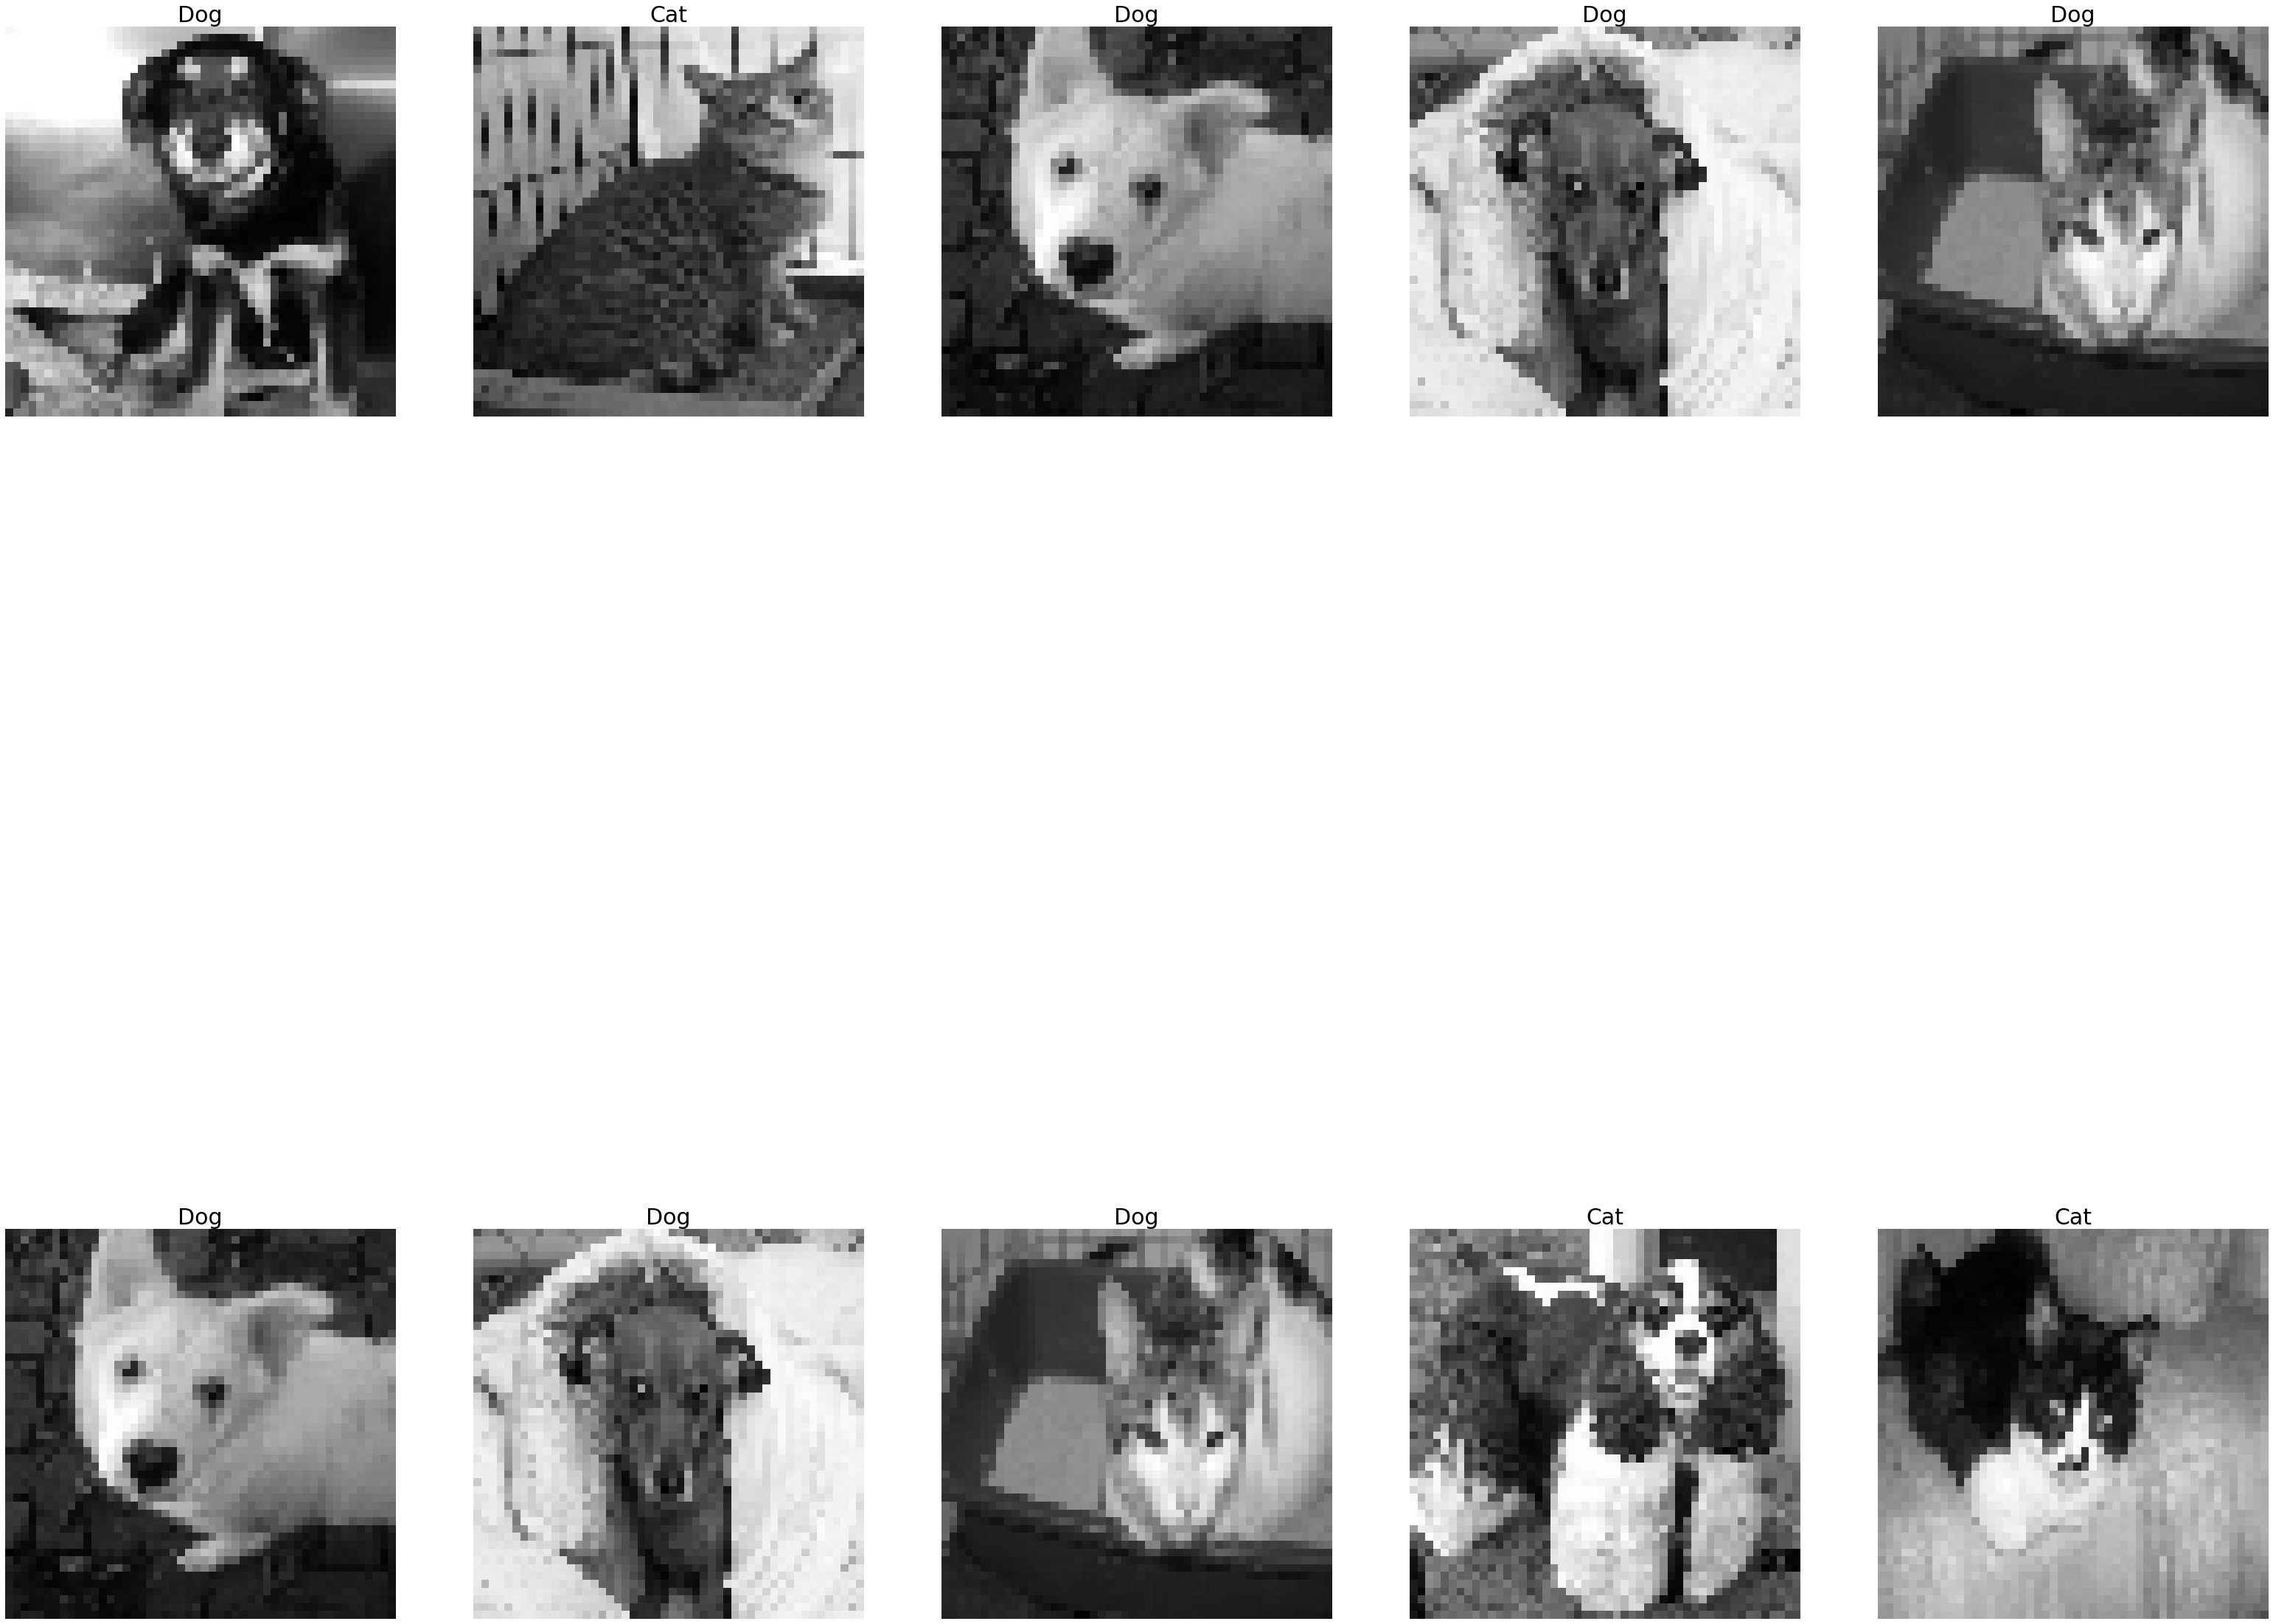

In [40]:
fig,axs=pt.subplots(2,5,figsize=(55,55))
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(Xtest[i*2+j],cmap='gray')
        axs[i,j].set_title(categories[pred_values[i*2+j]],fontsize=30)
        axs[i,j].axis('off')

In [33]:
model3.save('dog_cat_classifier.h5')